In [1]:
import sys
sys.path.append("/Users/danielmunson/dev/simple_net")

from pprint import pprint

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from simple_net.components.network import Network
from simple_net.functions.utils import (
    vectorize,
    random_subset
)
from simple_net.functions.cost import (
    mean_squared_error,
    mse_gradient,
    arithmetic_mean
)
from simple_net.functions.activations import (
    sigmoid,
    ddx_sigmoid
)

from simple_net.misc.scoring import (
    force_largest_component,
    binary_accuracy
)

In [3]:
from data.load_mnist import load_mnist
DATA_PATH = '/Users/danielmunson/dev/simple_net/data/mnist/train.csv'
train_ftrs, train_labels = load_mnist(DATA_PATH)

In [4]:
print(len(train_ftrs),len(train_labels))

42000 42000


In [21]:
layers = [784, 100, 10]
IN_DIMS = layers[0]
OUT_DIMS = layers[-1]

NN = Network(
    layer_dims = layers,
    activations = [sigmoid for _ in layers], # will automatically vectorize
    activation_derivatives = [ddx_sigmoid for _ in layers], # will automatically vectorize
    cost_function = mean_squared_error,
    cost_gradient = mse_gradient,
    learning_rate = 3,
    gradient_aggregator = arithmetic_mean
)

from random import choices

BATCH_SIZE = 100
EPOCHS = 1000
DATA_SIZE = len(train_ftrs)

accuracy_over_time = list()
for _ in range(EPOCHS):
    feature_subset, label_subset = random_subset(
        train_ftrs,
        train_labels,
        BATCH_SIZE
    )
    
    predictions = NN.run_epoch(feature_subset, label_subset)
    forced_preds = [force_largest_component(pred) for pred in predictions]
    accuracy = binary_accuracy(forced_preds, label_subset)
    accuracy_over_time.append(accuracy)

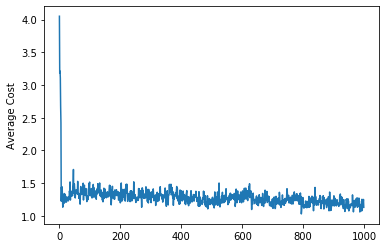

In [22]:
plt.plot(
    [i for i in range(len(NN._epochs))],
    [data['average_cost'] for data in NN._epochs]
)
plt.ylabel('Average Cost')
plt.show()

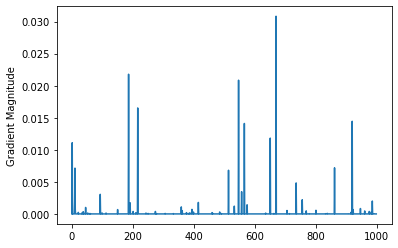

In [23]:
plt.plot(
    [i for i in range(len(NN._epochs))],
    [data['err_gradient_magnitude'] for data in NN._epochs]
)
plt.ylabel('Gradient Magnitude')
plt.show()

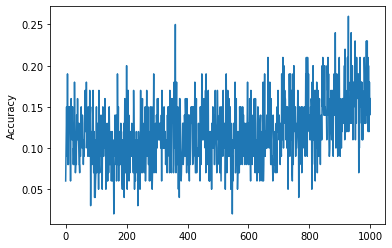

In [24]:
plt.plot(
    [i for i in range(len(NN._epochs))],
    [acc for acc in accuracy_over_time]
)
plt.ylabel('Accuracy')
plt.show()